## 06. PYTHON資料分析與視覺化繪圖 II - Panadas & Matplotlib

### Pandas

* Series: 類似於一維數組的對象，它由一組數據（各種NumPy數據類型）以及一組與之相關的數據標籤（即索引）組成
* Dataframe : 表格型的數據結構，它含有一組有序的列，每列可以是不同的值類型

#### 安裝套件

* Python 2+ : pip install pandas
* Python 3+ : pip3 install pandas

#### 引用套件

In [3]:
import pandas as pd

#### Series

In [4]:
#from pandas import Series
import pandas as pd

obj = pd.Series([5,10,-10,20])
print(obj)
print(obj.values)
print(obj.index)

0     5
1    10
2   -10
3    20
dtype: int64
[  5  10 -10  20]
RangeIndex(start=0, stop=4, step=1)


In [5]:
#給定索引
obj2 = pd.Series([10, 20, -5, 30], index=['d', 'b', 'a', 'c'])
print(obj2)
print(obj2.index)
print(obj2['a'])
print(obj2[['a','c']])

d    10
b    20
a    -5
c    30
dtype: int64
Index(['d', 'b', 'a', 'c'], dtype='object')
-5
a    -5
c    30
dtype: int64


In [6]:
# Ditctionary 轉化 
sdata = {'Ohio': 15000, 'Texas': 21000, 'Oregon': 16000, 'Utah': 5000}
print(type(sdata))
obj3 = pd.Series(sdata)
print(obj3)

<class 'dict'>
Ohio      15000
Oregon    16000
Texas     21000
Utah       5000
dtype: int64


In [7]:
# List轉化
states = ['California', 'Ohio', 'Oregon', 'Texas']
print(type(states))
obj4 = pd.Series(sdata, index=states)
print(obj4)
print(pd.isnull(obj4))

<class 'list'>
California        NaN
Ohio          15000.0
Oregon        16000.0
Texas         21000.0
dtype: float64
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool


In [8]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          15000.0
Oregon        16000.0
Texas         21000.0
Name: population, dtype: float64

In [9]:
#使用布林遮罩來取值
obj2 = pd.Series([10, 20, -5, 30], index=['d', 'b', 'a', 'c'])
print(obj2[obj2>0])
print(obj2[obj2>0]*2)
obj2[obj2<0] = 0
print(obj2)

# 依照index排序
print(obj2.sort_index())

#依照數值排序
print(obj2.sort_values())

d    10
b    20
c    30
dtype: int64
d    20
b    40
c    60
dtype: int64
d    10
b    20
a     0
c    30
dtype: int64
a     0
b    20
c    30
d    10
dtype: int64
a     0
d    10
b    20
c    30
dtype: int64


#### DataFrame

In [10]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

frame = pd.DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [11]:
frame = pd.DataFrame(data,columns=['year','pop','state','debt'],index=['one','two','three','four','five'])
frame
frame.columns
frame['year']
frame.year
frame.loc['two']
#del frame['debt']
frame

,year,pop,state,debt
one,2000,1.5,Ohio,NaN
two,2001,1.7,Ohio,NaN
three,2002,3.6,Ohio,NaN
four,2001,2.4,Nevada,NaN
five,2002,2.9,Nevada,NaN


##### 讀取MysQL資料庫

In [12]:
import MySQLdb
conn = MySQLdb.Connect(host="localhost",user = "root",passwd ="user",db="Demo",charset="utf8")
sql = "SELECT * FROM EMPLOYEE"
df = pd.read_sql_query(sql,con=conn)
df

ImportError: No module named 'MySQLdb'

In [ ]:
df['FIRST_NAME']
#df.loc[2]
#df.loc[2]['INCOME']

##### 讀取CSV檔案

* 資料來源 :gapminder.csv
* 紀錄 142 個國家 1952 至 2007 年每五年的資訊

In [14]:
import pandas as pd

csv_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
gapminder = pd.read_csv(csv_file)

##### Gapminder資料分析

In [17]:
#顯示型態 - type()

print(type(gapminder))
print(type(gapminder['country']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
# 顯示前 N 筆資料 - head(N) , 預設N為前五筆
gapminder.head()
#gapminder.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [20]:
# 顯示後 N 筆資料 - tail(N), 預設 N 為 五筆
gapminder.tail()
#gapminder.tail(10)

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [21]:
#顯示欄位- DataFrame.columns()

gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [22]:
#顯示列欄數- DataFrame.shape()
gapminder.shape

(1704, 6)

In [23]:
#顯示列索引資訊- DataFrame.index()
gapminder.index

RangeIndex(start=0, stop=1704, step=1)

In [24]:
#顯示詳細資訊- DataFrame.info()

gapminder.info()
#gapminder.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [25]:
#顯示各變數描述統計資訊- DataFrame.describe()

gapminder.describe()
#gapminder['gdpPercap'].describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [26]:
#顯示特定欄位資料
gapminder[['country']]
#gapminder[['country', 'continent']]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [27]:
#條件查詢,找尋Taiwan資料

gapminder[gapminder['country'] == 'Taiwan']

#gapminder[gapminder['country'] == 'Taiwan'][['country', 'continent','year','pop']]

,country,continent,year,lifeExp,pop,gdpPercap
1500,Taiwan,Asia,1952,58.50,8550362,1206.947913
1501,Taiwan,Asia,1957,62.40,10164215,1507.861290
1502,Taiwan,Asia,1962,65.20,11918938,1822.879028
1503,Taiwan,Asia,1967,67.50,13648692,2643.858681
1504,Taiwan,Asia,1972,69.39,15226039,4062.523897
1505,Taiwan,Asia,1977,70.59,16785196,5596.519826
1506,Taiwan,Asia,1982,72.16,18501390,7426.354774
1507,Taiwan,Asia,1987,73.40,19757799,11054.561750
1508,Taiwan,Asia,1992,74.26,20686918,15215.657900
1509,Taiwan,Asia,1997,75.25,21628605,20206.820980


In [28]:
# 新增欄位

gapminder['country_abb'] = gapminder['country'].apply(lambda x: x[:3])
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,country_abb
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,Afg
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,Afg
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,Afg
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,Afg
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,Afg
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,Zim
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,Zim
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,Zim
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,Zim


In [29]:
# 刪除欄位
# dataframe.drop() : axis = 0 表示要刪除觀測值（row），axis = 1 表示要刪除欄位（column）。

gapminder = gapminder.drop(0,axis=0)
#gapminder = gapminder.drop('country_abb',axis=1)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,country_abb
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,Afg
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,Afg
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,Afg
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,Afg
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,Afg
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,Zim
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,Zim
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,Zim
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,Zim


In [30]:
# 資料加總 -- .sum()

gapminder[gapminder['year'] == 2007][['pop']].sum()


pop    6251013179
dtype: int64

In [31]:
# 計算資料平均值-- .mean()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].mean()

lifeExp         67.007423
gdpPercap    11680.071820
dtype: float64

In [34]:
# 計算資料最大值-- .max()

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].max()

lifeExp         82.60300
gdpPercap    49357.19017
dtype: float64

In [35]:
# 計算資料最小值-- .min()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].min()

lifeExp       39.613000
gdpPercap    277.551859
dtype: float64

In [37]:
# 計算資料標準差-- .std()

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].std()

lifeExp         12.073021
gdpPercap    12859.937337
dtype: float64

In [38]:
# 計算資料中位數-- .median()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].median()

lifeExp        71.935500
gdpPercap    6124.371109
dtype: float64

In [42]:
# 計算資料分位數-- .quantile()
# 計算分位數時，如果資料中有包含 NA，則會自動忽略此筆資料。
# 例如有 10 筆資料，其中一筆為 NA，則計算時只會拿 9 筆資料來計算分位數。

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].quantile()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].quantile(q=[0.25, 0.5, 0.75])

,lifeExp,gdpPercap
0.25,57.16025,1624.842248
0.50,71.93550,6124.371109
0.75,76.41325,18008.835640


In [43]:
# 計算資料眾數-- .mode()

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].mode()

,lifeExp,gdpPercap
0,39.613,277.551859
1,42.082,414.507341
2,42.384,430.070692
3,42.568,469.709298
4,42.592,579.231743
...,...,...
137,81.235,40675.996350
138,81.701,42951.653090
139,81.757,47143.179640
140,82.208,47306.989780


In [44]:
# 計算欄位之間的線性關係強度和方向 -- .corr()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap','pop']].corr()

,lifeExp,gdpPercap,pop
lifeExp,1.000000,0.678662,0.047553
gdpPercap,0.678662,1.000000,-0.055676
pop,0.047553,-0.055676,1.000000


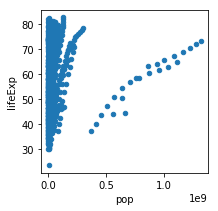

In [47]:
gapminder.plot(x='pop', y='lifeExp', kind='scatter', figsize=(3,3))

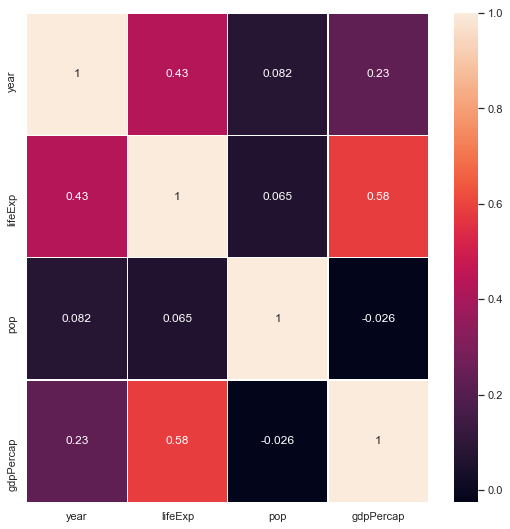

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(gapminder.corr(), annot=True, annot_kws={'fontsize': 12}, linewidths=.1, ax=ax)


In [50]:
# 資料排序 -- sort_values()
gapminder.sort_values(axis=0, by='pop', ascending=False, na_position='first', inplace=True)


In [51]:
display(gapminder.loc[:, ['country','year','pop']].tail(10))

,country,year,pop
1302,Sao Tome and Principe,1982,98593
422,Djibouti,1962,89898
1301,Sao Tome and Principe,1977,86796
1300,Sao Tome and Principe,1972,76595
421,Djibouti,1957,71851
1299,Sao Tome and Principe,1967,70787
1298,Sao Tome and Principe,1962,65345
420,Djibouti,1952,63149
1297,Sao Tome and Principe,1957,61325
1296,Sao Tome and Principe,1952,60011


### 資料繪圖 - Matplotlib

說明 : https://matplotlib.org/

#### 安裝套件
* Python 2+ : pip install matplotlib
* Python 3+ : pip3 install matplotlib

#### 引用套件

In [52]:
import matplotlib
import matplotlib.pyplot as plt

#### 折線圖

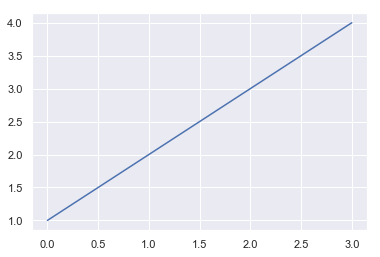

In [53]:
import matplotlib.pyplot as plt
X = [1,2,3,4]
plt.plot(X) 
plt.show()

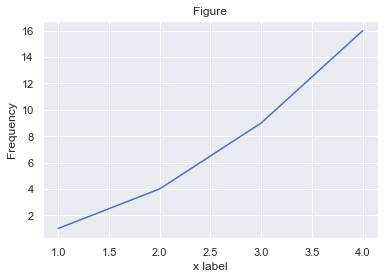

In [54]:
X = [1,2,3,4]
Y = [1,4,9,16]
plt.plot(X,Y)
plt.ylabel('Frequency')
plt.xlabel('x label')
plt.title('Figure')
plt.show()


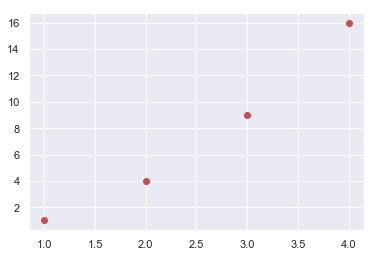

In [55]:
plt.plot(X,Y,'ro')

#### 長條圖

<BarContainer object of 4 artists>

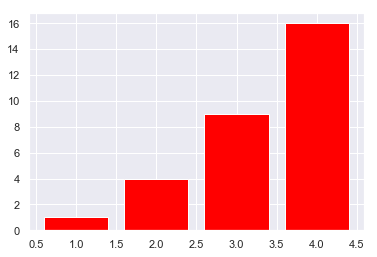

In [56]:
import matplotlib.pyplot as plt
X = [1,2,3,4]
Y = [1,4,9,16]
plt.bar(X,Y,color="red")

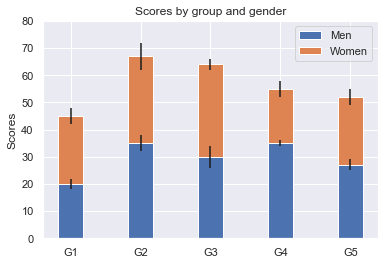

In [57]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

#### 散佈圖

Text(0.5, 1.0, 'Figure')

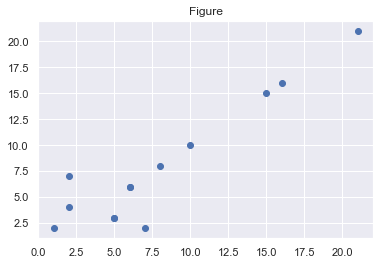

In [58]:
import matplotlib.pyplot as plt
X = [1,5,2,6,2,5,7,10,15,6,8,21,16]
Y = [2,3,4,6,7,3,2,10,15,6,8,21,16]
plt.scatter(X,Y)
plt.title('Figure')

#### 圓餅圖

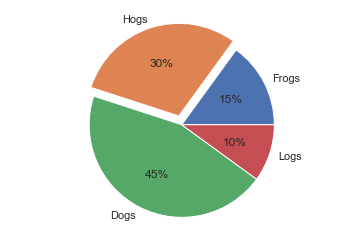

In [59]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

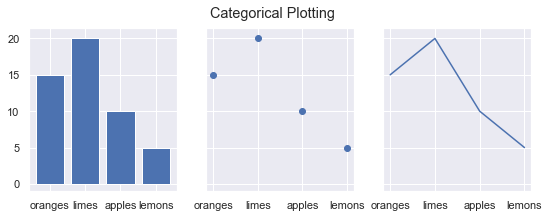

In [60]:
import matplotlib.pyplot as plt

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

## 07自動化爬蟲 BeautifulSoup & Selenium

### 網頁解析 & 自動化測試套件
* Beautiful Soup
* Selenium

### Beautiful Soup

#### 安裝套件
* Python 2+ : pip install beautifulsoup4
* Python 3+ : pip3 install beautifulsoup4

#### 引用 Beautiful Soup 模組

In [61]:
from bs4 import BeautifulSoup

#### 使用Beautiful Soup 解析網頁

In [62]:
html_doc = """
<html><head><title>Hello World</title>

<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>

</head>
<body><h2>Test Header</h2>
<p>This is a test.</p>
<a id="link1" href="https://www.google.com.tw"> Google網站</a>
<a id="link2" class="large" href="https://www.facebook.com.tw">FaceBook</a>
<p>Hello, <b id="link1" class="boldtext">Bold Text</b></p>
</body></html>
"""

In [63]:
# 以 Beautiful Soup 解析 HTML 程式碼

soup = BeautifulSoup(html_doc, 'html.parser')
#soup = BeautifulSoup(open('data/A.html'), 'html.parser')

In [64]:
#將soup物件美化
print(soup.prettify())

<html>
 <head>
  <title>
   Hello World
  </title>
  <style>
   .large {
      color:blue;
      text-align: center;
    }
  </style>
 </head>
 <body>
  <h2>
   Test Header
  </h2>
  <p>
   This is a test.
  </p>
  <a href="https://www.google.com.tw" id="link1">
   Google網站
  </a>
  <a class="large" href="https://www.facebook.com.tw" id="link2">
   FaceBook
  </a>
  <p>
   Hello,
   <b class="boldtext" id="link1">
    Bold Text
   </b>
  </p>
 </body>
</html>



In [65]:
soup.html

<html><head><title>Hello World</title>
<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>
</head>
<body><h2>Test Header</h2>
<p>This is a test.</p>
<a href="https://www.google.com.tw" id="link1"> Google網站</a>
<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>
<p>Hello, <b class="boldtext" id="link1">Bold Text</b></p>
</body></html>

#### 解析網頁結構

In [67]:
# Head tag

In [68]:
soup.head

<head><title>Hello World</title>
<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>
</head>

In [69]:
soup.head.text

'Hello World\n\n    .large {\n      color:blue;\n      text-align: center;\n    }\n\n'

In [70]:
# Title tag

In [71]:
soup.title

<title>Hello World</title>

In [72]:
soup.title.text
#soup.title.string

'Hello World'

In [73]:
# body tag 
soup.body

<body><h2>Test Header</h2>
<p>This is a test.</p>
<a href="https://www.google.com.tw" id="link1"> Google網站</a>
<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>
<p>Hello, <b class="boldtext" id="link1">Bold Text</b></p>
</body>

In [74]:
soup.body.text

'Test Header\nThis is a test.\n Google網站\nFaceBook\nHello, Bold Text\n'

In [75]:
soup.body.a['href']

'https://www.google.com.tw'

In [76]:
# a tag 
soup.a

<a href="https://www.google.com.tw" id="link1"> Google網站</a>

In [77]:
soup.a.text
#soup.a.string

' Google網站'

In [78]:
soup.a['href']

'https://www.google.com.tw'

In [79]:
# p tag 
soup.p

<p>This is a test.</p>

In [80]:
soup.p.text
#soup.p.string

'This is a test.'

In [81]:
#.contents 属性可將tag的子節點以列表方式输出
print(soup.head.contents)

print(len(soup.head.contents))

for item in soup.head.contents:
    print(item)

[<title>Hello World</title>, '\n', <style>
    .large {
      color:blue;
      text-align: center;
    }
</style>, '\n']
4
<title>Hello World</title>


<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>




In [82]:
#.children 訪問子節點
for item in soup.head.children:
    print(item)

<title>Hello World</title>


<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>




In [83]:
#.children 訪問子節點
for item in soup.head.children:
    print(item)

<title>Hello World</title>


<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>




In [84]:
print(soup.title.string)

print(soup.title.string.parent)

Hello World
<title>Hello World</title>


In [85]:
#.next_sibling 和 .previous_sibling 属性来訪問同一層兄弟節點
print(soup.body)
print("-----")
print(soup.body.p)
print("-----")

body = soup.body
print(body.p)
print(body.p.next_sibling)
print(body.p.next_sibling.next_sibling)
print(body.p.next_sibling.next_sibling.previous_sibling.previous_sibling)

<body><h2>Test Header</h2>
<p>This is a test.</p>
<a href="https://www.google.com.tw" id="link1"> Google網站</a>
<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>
<p>Hello, <b class="boldtext" id="link1">Bold Text</b></p>
</body>
-----
<p>This is a test.</p>
-----
<p>This is a test.</p>


<a href="https://www.google.com.tw" id="link1"> Google網站</a>
<p>This is a test.</p>


In [86]:
#取得網頁所有文字內容
print(soup.getText())


Hello World

    .large {
      color:blue;
      text-align: center;
    }


Test Header
This is a test.
 Google網站
FaceBook
Hello, Bold Text




In [87]:
for string in soup.strings:
    print(string)
    #print(repr(string))



Hello World



    .large {
      color:blue;
      text-align: center;
    }





Test Header


This is a test.


 Google網站


FaceBook


Hello, 
Bold Text






In [88]:
# .stripped_strings 可以移除多餘的空白内容:
for string in soup.stripped_strings:
    print(string)
    #print(repr(string))

Hello World
.large {
      color:blue;
      text-align: center;
    }
Test Header
This is a test.
Google網站
FaceBook
Hello,
Bold Text


#### 搜尋單一節點

In [89]:
#搜尋節點 by tag
a_tag = soup.find('a')
print(a_tag.text)
print(a_tag['href'])
print(a_tag.get('href')) # .get(attribute's name) 取得tag 屬性內容

 Google網站
https://www.google.com.tw
https://www.google.com.tw


In [90]:
#搜尋節點 by tag ,tag id
a_tag = soup.find(name ='a',attrs={"id":"link2"})
#a_tag = soup.find('a',{'id':"link2"})
print(a_tag.text)

FaceBook


In [91]:
#搜尋節點 by tag ,class name
a_tag = soup.find(name ='a',attrs={"class":"large"})
#a_tag = soup.find('a',{'class':"large"})
#a_tag = soup.find('a','large')

print(a_tag.text)
print(a_tag['href'])
print(a_tag['class'])

FaceBook
https://www.facebook.com.tw
['large']


In [92]:
tags = soup.find(["a", "b"]) #只會找到第一個符合的節點 
print(tags)

<a href="https://www.google.com.tw" id="link1"> Google網站</a>


#### 搜尋節點

In [93]:
#搜尋節點
a_tags = soup.find_all('a')
for tag in a_tags:
    print(tag.text)
    print(tag['href'])

 Google網站
https://www.google.com.tw
FaceBook
https://www.facebook.com.tw


In [94]:
#取出節點屬性
for tag in a_tags:
    print(tag.get('href'))
    print(tag.get('class'))

https://www.google.com.tw
None
https://www.facebook.com.tw
['large']


In [95]:
# 搜尋所有超連結與粗體字
tags = soup.find_all(["a", "b"])
print(tags)

for tag in tags:
    print(tag)
    print(tag.text)
    print(tag.get('href'))

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>, <a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>, <b class="boldtext" id="link1">Bold Text</b>]
<a href="https://www.google.com.tw" id="link1"> Google網站</a>
 Google網站
https://www.google.com.tw
<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>
FaceBook
https://www.facebook.com.tw
<b class="boldtext" id="link1">Bold Text</b>
Bold Text
None


In [96]:
# 限制搜尋結果數量
tags = soup.find_all(["a", "b"], limit=2)
print(tags)

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>, <a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]


#### Select 選擇器

In [98]:
soup.select("title")

[<title>Hello World</title>]

In [99]:
soup.select("body a")

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>,
 <a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [100]:
# Select by css name 
soup.select(".large")

[<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [101]:
soup.select("a.large")

[<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [102]:
# Select by id 
soup.select("#link1")

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>,
 <b class="boldtext" id="link1">Bold Text</b>]

In [103]:
soup.select("a#link1")

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>]

In [104]:
#依據屬性來選擇
soup.select('a[href]')

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>,
 <a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [105]:
soup.select('a[class]')

[<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [106]:
soup.select('a[style]')

[]

In [109]:
### Example-1 抓取蘋果新聞清單

In [107]:
import requests
from bs4 import BeautifulSoup

domainurl='http://www.appledaily.com.tw/realtimenews/section/new/'

res = requests.get(domainurl)
soup = BeautifulSoup(res.text)

#print (soup)

for news in soup.select('.rtddt'):
        link = news.select('a')[0]['href']
        Type = news.select('h2')[0].text
        Title = news.select('h1')[0].text
        print (Type, Title)
        print (link)

社會 躺沙發嘴唇發黑　南投仁愛鄉建設課長猝死辦...
https://tw.news.appledaily.com/local/realtime/20190826/1622819/
生活 韓國瑜授證觀光夜市標章　勉210家攤商愛...
https://tw.news.appledaily.com/life/realtime/20190826/1622934/
社會 悲！不願拖累子女　癌男推失智妻下水後輕生
https://tw.news.appledaily.com/local/realtime/20190826/1622814/
特企 
【特企】【蘋果大明星】香港樂團Suppe...   

https://tw.entertainment.appledaily.com/realtime/20190826/1620523/
微視蘋 【微視蘋】無差別愛人太催淚　法裔劉一峰神...
https://tw.news.appledaily.com/micromovie/realtime/20190826/1617903/
社會 【私菸幕後】吳宗憲用這張信用卡買菸　賺了...
https://tw.news.appledaily.com/local/realtime/20190826/1622950/
娛樂 最強小王讓蔡阿嘎氣氣氣　「二伯是我的」宣...
https://tw.entertainment.appledaily.com/realtime/20190826/1622964/
社會 【獨家】女報案男友遭擄　警衝摩鐵救人撿到...
https://tw.news.appledaily.com/local/realtime/20190826/1622929/
社會 彰化第六信用合作社中午遭搶　持槍歹徒當場...
https://tw.news.appledaily.com/local/realtime/20190826/1622941/
政治 【蘋果周周對比民調4】郭台銘不用加入民眾...
https://tw.news.appledaily.com/politics/realtime/20190826/1622904/
社會 【獨家新聞　升級壹會員獨享】今日精選：容...
https://tw.news.appledaily.com/local/realtime/2

####  Example-2 抓取蘋果新聞內文

In [111]:
import requests
from bs4 import BeautifulSoup

domainurl='https://tw.news.appledaily.com/international/realtime/20181030/1457243/'

res = requests.get(domainurl)
soup = BeautifulSoup(res.text)

#print (soup)

title = soup.select('article.ndArticle_leftColumn h1')[0].text
content = soup.select('article.ndArticle_content div.ndArticle_margin p')[0].text
print(title)
print(content)

【金庸逝世14】挑哪一段向金庸致敬？網友選「蛛兒淚拒無忌表哥」
一代武俠小說泰斗查良鏞（筆名為金庸）今晚驚傳逝世，享年94歲，網友們紛紛哀悼，有位粉絲就問大家：「如果要挑一個段子跟大師致敬，你會挑哪一段？」 這位網友在《PTT》「八卦板」發文說：「話說，金學，陪伴著大家高中那段青澀歲月，練功，武林絕學，飛雪連天射白鹿，笑書神俠倚碧鴛。沒練完功的自己去補齊。如果要挑個段子跟大師致敬，大家印象最深的是那段啊？」這位網友引了這段：她轉過頭來，柔聲道「阿牛哥哥，你一直待我很好，我好生感激。可是我的心，早就許了給那個狠心的、兇惡的小張無忌了。你不是他，不，不是他……」（摘自《倚天屠龍記》）不識張郎是張郎。永別了。大師。 （即時新聞中心／綜合報導）


#### Example-3 抓取蘋果新聞清單列表,內文並儲存至資料庫

In [113]:
import pymongo
import requests
from bs4 import BeautifulSoup


def getContent(link):
    res = requests.get(link)
    soup = BeautifulSoup(res.text)
    title = soup.select('article.ndArticle_leftColumn h1')[0].text
    content = soup.select('article.ndArticle_content div.ndArticle_margin p')[0].text
    #print(title)
    #print(content)
    return content

def insertDB(tag,title,link,content):
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient["Article"]
    mycol = mydb['AppleNews']
    mydict = { "tag": tag,"title":title,"link": link, "content":content } 
    x = mycol.insert_one(mydict) 
    print(x.inserted_id) 

domainurl='http://www.appledaily.com.tw/realtimenews/section/new/'

res = requests.get(domainurl)
soup = BeautifulSoup(res.text)


for news in soup.select('.rtddt'):
        link = news.select('a')[0]['href']
        tag= news.select('h2')[0].text
        title = news.select('h1')[0].text
        print (tag, title)
        print (link)
        content = getContent(link)
        insertDB(tag,title,link,content)

社會 躺沙發嘴唇發黑　南投仁愛鄉建設課長猝死辦...
https://tw.news.appledaily.com/local/realtime/20190826/1622819/


ServerSelectionTimeoutError: localhost:27017: [WinError 10061] 無法連線，因為目標電腦拒絕連線。

#### Example-4 抓取PTT文章內容及回文

In [118]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://www.ptt.cc/bbs/Gossiping/M.1566801093.A.9BC.html')
soup = BeautifulSoup(res.text)
mainContent = soup.find(name = 'div',attrs={"class":"bbs-screen bbs-content"})
#print(mainContent)
content = mainContent.text
print(content)



本網站已依網站內容分級規定處理
警告︰您即將進入之看板內容需滿十八歲方可瀏覽。
若您尚未年滿十八歲，請點選離開。若您已滿十八歲，亦不可將本區之內容派發、傳閱、出售、出租、交給或借予年齡未滿18歲的人士瀏覽，或將本網站內容向該人士出示、播放或放映。




In [116]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://www.ptt.cc/bbs/HatePolitics/M.1539669111.A.B2D.html')
soup = BeautifulSoup(res.text)
mainContent = soup.find(name = 'div',attrs={"class":"bbs-screen bbs-content"})
#print(mainContent)
content = mainContent.text
print(content)


board_meta = mainContent.find(name = 'div',attrs={"class":"article-metaline-right"})
#print(board_meta)
board_tag = board_meta.find(name = 'span',attrs={"class":"article-meta-tag"}).text
board_value = board_meta.find(name = 'span',attrs={"class":"article-meta-value"}).text
print(board_tag,board_value)

article_meta = mainContent.find_all(name = 'div',attrs={"class":"article-metaline"})

#get meta-data
for item in article_meta:
    meta_tag = item.find(name = 'span',attrs={"class":"article-meta-tag"}).text
    meta_value =  item.find(name = 'span',attrs={"class":"article-meta-value"}).text
    print(meta_tag,meta_value)
    
 
    
feebackList = mainContent.find_all(name = 'div',attrs={"class":"push"})
for feeback in feebackList:
     push_userId= feeback.find(name ='span',attrs={"class":"f3 hl push-userid"}).text
     push_content = feeback.find(name='span',attrs={"class":"f3 push-content"}).text
     push_time = feeback.find(name='span',attrs={"class":"push-ipdatetime"}).text
     print(push_userId,push_content,push_time )
    
for remove in mainContent(['span','div']):
     remove.decompose()

print(mainContent)



本網站已依網站內容分級規定處理
警告︰您即將進入之看板內容需滿十八歲方可瀏覽。
若您尚未年滿十八歲，請點選離開。若您已滿十八歲，亦不可將本區之內容派發、傳閱、出售、出租、交給或借予年齡未滿18歲的人士瀏覽，或將本網站內容向該人士出示、播放或放映。




AttributeError: 'NoneType' object has no attribute 'find'

### Selenium

#### 安裝套件

* Python 2+ : pip install selenium
* Python 3+ : pip3 install selenium
* Install Chrome WebDriver : sudo apt-get install chromium-chromedriver

#### 引用套件

In [137]:
from selenium import webdriver

#### 啟動瀏覽器

In [138]:
driver = webdriver.Chrome()
#driver = webdriver.Chrome('/usr/lib/chromium-browser/chromedriver')

In [139]:
#設定視窗最大化
driver.maximize_window()

In [140]:
url = 'http://www.google.com'
driver.get(url)

In [141]:
#回傳目前的網址
driver.current_url

'https://www.google.com/?gws_rd=ssl'

In [142]:
# 網頁重新整理
driver.refresh()

In [143]:
# 儲存截圖 save_screenshot()
driver.save_screenshot('pic/screen.png')

False

In [144]:
driver.close() #關閉目前視窗
#driver.quit() #關閉所有視窗,並退出Driver

#### 元素定位

##### By id


In [135]:
# <div id="aaa">...</div>

In [136]:
driver.find_element_by_id("aaa")
driver.find_elements_by_id("aaa")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


In [ ]:
from selenium.webdriver.common.by import By
driver.find_element(By.ID, "aaa")
driver.find_elements(By.ID, "aaa")

##### By Class Name

In [145]:
#<div class="myclass">...</div>

In [ ]:
driver.find_element_by_class_name("myclass")
driver.find_elements_by_class_name("myclass")

In [ ]:
from selenium.webdriver.common.by import By
driver.find_element(By.CLASS_NAME, "myclass")
driver.find_elements(By.CLASS_NAME, "myclass")

##### By Name

In [146]:
#<div name="abc">...</div>

In [147]:
driver.find_element_by_name("abc")
driver.find_elements_by_name("abc")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


In [148]:
from selenium.webdriver.common.by import By
driver.find_element(By.NAME, "abc")
driver.find_elements(By.NAME, "abc")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


##### By CSS

In [ ]:
#<div id="area"><span class="location">abc</span></div>

In [ ]:
driver.find_element_by_css_selector("#area span.location")
driver.find_elements_by_css_selector("#area span.location")

In [149]:
from selenium.webdriver.common.by import By
driver.find_element("#area span.location")
driver.find_elements("#area span.location")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


##### By Link Text

In [ ]:
#<a href="http://www.google.com/search?q=iphone">iphone</a>>

In [ ]:
driver.find_element_by_link_text("iphone")
driver.find_elements_by_link_text("iphone")

In [ ]:
from selenium.webdriver.common.by import By
driver.find_element(By.LINK_TEXT, "iphone")
driver.find_elements(BY.LINK_TEXT, "iphone")

##### By Partial Link Text

In [ ]:
#<a href="http://www.google.com/search?q=iphone">iphone</a>>

In [ ]:
driver.find_element_by_partial_link_text("phone")
driver.find_elements_by_partial_link_text("phone")

In [150]:
from selenium.webdriver.common.by import By
driver.find_element(By.PARTIAL_LINK_TEXT, "phone")
driver.find_elements(By.PARTIAL_LINK_TEXT, "phone")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


##### By XPATH

In [ ]:
#<input type="text" name="abc" />

In [ ]:
driver.find_element_by_xpath("//input")
driver.find_elements_by_xpath("//input")

In [151]:
from selenium.webdriver.common.by import By
driver.find_element(By.XPATH, "//input")
driver.find_elements(By.XPATH, "//input")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


##### 常用Action
* send_keys('XXX') : 輸入框輸入內容
* click() : 點擊
* get_attribute(name) : 得到特定屬性的值
* clear() :清除輸入的內容
* location :回傳元素位置
* submit() : 提交內容 (Form)

##### Example 8591

In [192]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [193]:
driver = webdriver.Chrome()

In [194]:
driver.get('https://www.591.com.tw/')

In [195]:
driver.find_element_by_id('auto-search-input')

<selenium.webdriver.remote.webelement.WebElement (session="fc4172ba9cadbe23fd56eb7ddd66eb5b", element="0.08517587697375273-1")>

In [196]:
a = driver.find_element_by_id('auto-search-input')

In [197]:
a.get_attribute("class")

'auto-search-input ie-color'

In [198]:
a.location

{'x': 185, 'y': 280}

In [199]:
driver.find_element_by_id('auto-search-input').send_keys('竹東')

In [200]:
driver.find_element_by_id('auto-search-input').clear()

In [201]:

driver.find_element_by_id('auto-search-input').send_keys('竹北')

In [202]:
driver.find_element_by_id('auto-search-input').send_keys(Keys.ENTER)

In [203]:
driver.find_element_by_xpath('//*[@id="search-location"]/span[1]/i').click()

In [204]:
driver.find_element_by_link_text('新竹縣').click()

In [205]:
driver.find_element_by_xpath('//*[@id="optionBox"]/li[3]/label/span').click()

In [206]:
driver.find_element_by_xpath('//*[@id="optionBox"]/li[1]/label/span').click()

In [207]:
driver.find_element_by_link_text('獨立套房').click()

In [208]:
driver.find_element_by_xpath('//*[@id="search-price"]/span[3]').click()

In [209]:
driver.find_element_by_xpath('//*[@id="search-plain"]/span[2]').click()

In [210]:
print(driver.current_url)

https://rent.591.com.tw/?kind=2&type=1&region=5&rentprice=2&area=0,10


In [211]:
driver.find_element_by_partial_link_text('三民路').click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"partial link text","selector":"三民路"}
  (Session info: chrome=76.0.3809.100)
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


In [212]:
target = driver.find_elements_by_partial_link_text('飯店')

In [213]:
for item in target :
    item.click()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=76.0.3809.100)
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)
